# Zomato Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data first:

In [3]:
df=pd.read_csv("zomato.csv.zip",encoding="latin-1")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# Checking what all columns do we have:

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
# Getting the idea of what datatype the data is:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
# Getting the summary statistics of the data:

In [9]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


 ###  Basic things we do in Data Analysis:
    
    1. Finding the missing values.
    2. Explore about the numerical variables.
    3. Explore about the categorical variables.
    4. Finding relationship between features.

In [10]:
# Shape of the data:

In [11]:
df.shape

(9551, 21)

In [12]:
# Let us see the sum of the missing values of each variable:

In [13]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [14]:
# Another way to see which column has null values:

In [15]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [16]:
# Let us see there is new file country_code.So we will read it:

In [17]:
df_country=pd.read_excel("Country-Code.xlsx")
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [18]:
# We have the country code as the excel file. So we need to combine the zomato file with the country code file. We also have the
#country code in the zomato file as well as in the excel file. So it is good to combine the two data with each other.

In [19]:
df1=pd.merge(df,df_country,on="Country Code",how="left")

In [20]:
df1.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [21]:
# To check the datatypes of the data:

In [22]:
df1.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [23]:
# Columns in the updated data set:

In [24]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [25]:
# To check the country names:

In [26]:
country_names=df1.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [27]:
country_values=df1.Country.value_counts().values
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

In [28]:
# To know how many countries value count is present:

In [29]:
df1.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [30]:
# Let us display this information of the top 3 countries with the help of Pie-Chart:

([<matplotlib.patches.Wedge at 0x1da8252e2e0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

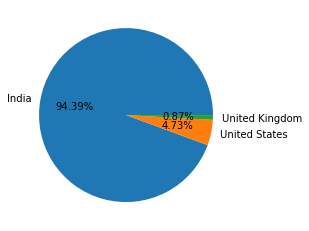

In [31]:
plt.pie(country_values[:3],labels=country_names[:3],autopct="%1.2f%%")

## Observation:
"""Zomato maximum records or transactions are from India.
After that US followed by UK."""

In [32]:
# We are going to analyse the "Rating" details of the data:

In [33]:
ratings=df1.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns={0:"Rating Count"})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observations:

    1.Whenever the rating is 4.5 to 4.9---->Excellent
    2.Whenever the ratings is between 4.0 to 4.4------>Very Good
    3.When the rating is between 3.5 to 3.9---------> Good
    4.When the rating is between 3.0 to 3.4--------> Average
    5.When the rating is between 2.5 to 2.9-------> Average
    6.When the rating is between 2.0 to 2.4-------> Poor

In [34]:
# Plot a simple barplot to visualize the ratings observation:

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

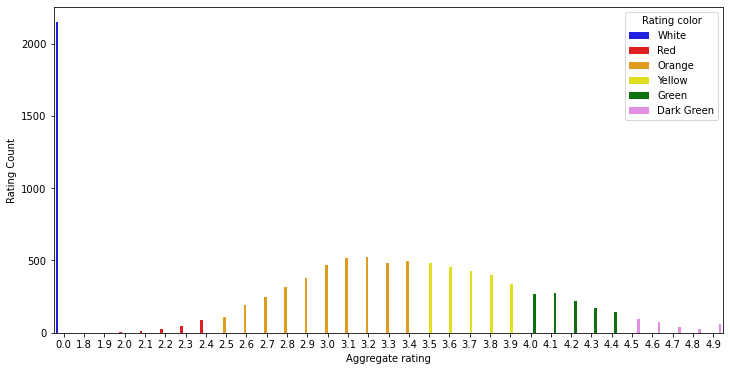

In [35]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="Aggregate rating",y="Rating Count",hue="Rating color",data=ratings,palette=["blue","red","orange","yellow","green","violet"])

In [36]:
ratings["Aggregate rating"].mean()

3.2484848484848485

## Observation:
    1.Not Rated count is very high 
    2.Maximum number of ratings are between 2.5 to 3.4
    3.The average ratings are 3.2

In [37]:
# Let us use the countplot: This helps us to see that how many records are there. Eg White we have 1 record.
#Through countplot we can can visualize the number of records in the data.

<AxesSubplot:xlabel='Rating color', ylabel='count'>

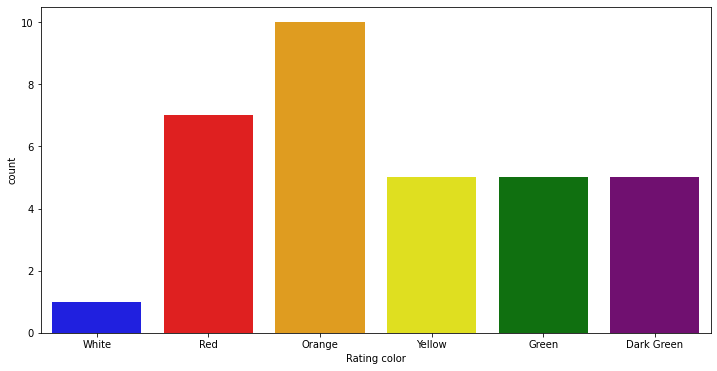

In [38]:
sns.countplot(x="Rating color",data=ratings,palette=["blue","red","orange","yellow","green","purple"])

In [39]:
# Finding the countries name that has given 0 ratings:
#We can find this with the help of rating color/Aggregate rating with the country.

In [40]:
no_ratings=df1.groupby(["Aggregate rating","Country"]).size().reset_index().rename(columns={0:"No Ratings"}).head()

In [41]:
no_ratings

,Aggregate rating,Country,No Ratings
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [42]:
df1[df1["Aggregate rating"]==0].Country.value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

## Observation:
     Maximum no. of 0 ratings are from Indian customer.

In [47]:
# Popular cuisine ordered:

df1["Cuisines"].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

##### Observation:
North Indian Cuisine is the most ordered cuisine followed by Chinese and then Fast food.

In [43]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [44]:
# Which currency is used the most :

df1[["Country","Currency"]].value_counts()

Country         Currency              
India           Indian Rupees(Rs.)        8652
United States   Dollar($)                  434
United Kingdom  Pounds(£)                  80
Brazil          Brazilian Real(R$)          60
South Africa    Rand(R)                     60
UAE             Emirati Diram(AED)          60
New Zealand     NewZealand($)               40
Turkey          Turkish Lira(TL)            34
Australia       Dollar($)                   24
Phillipines     Botswana Pula(P)            22
Indonesia       Indonesian Rupiah(IDR)      21
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
Sri Lanka       Sri Lankan Rupee(LKR)       20
Canada          Dollar($)                    4
dtype: int64

In [45]:
# Which countries do have online deliveries:

In [46]:
df1[df1["Has Online delivery"]=="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

## Interpretation:

1. Zomato maximum transactions are from India i.e around 94%. After that US followed by UK.
2. The average rating for Zomato's service is around 3.25
3. Maximum number of ratings are between 2.5 to 3.4
4. Not Rated count is very high
5. Maximum no. of 0 ratings are from Indian customer
6. India has the highest online deliveries.
7. North Indian Cuisine is the most ordered cuisine followed by Chinese and then Fast food.